In [1]:
# import all libraries needed or our work
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import json
import time
import warnings
import re
import seaborn as sns 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 1. Gathering Data

   A) Import Twitter Archive Enhanced

In [2]:
# Will download it manually
twitter_enh = pd.read_csv('data/twitter-archive-enhanced.csv')

Testing

In [3]:
twitter_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


    B) Downloading Twitter image predictions (using URL provided)

In [4]:
# Downloading it programatically using Request 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('data/image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
  
# Displaying the TSV file and checking insights
image_prediction = pd.read_csv('data/image-predictions.tsv', sep='\t' )

Test

In [5]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


    C) Using Twitter API provided by Udacity as unable to obtain Twitter developer account

In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# The Below infor. is hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Will Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# Will be Saving each tweet's returned JSON as a new line in a .txt file (text file)
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#           print("Fail")
#            fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

Change text file to list

In [7]:
# Change from text file to list
with open('data/tweet_json.txt') as file:
    df_api = pd.read_json(file, lines= True)

In [8]:
# Remove unnecessary column from df_api
df_json = df_api[['favorite_count', 'id','retweet_count']]

Testing to make sure list created

In [9]:
df_json

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
...,...,...,...
2349,111,666049248165822465,41
2350,311,666044226329800704,147
2351,128,666033412701032449,47
2352,132,666029285002620928,48


## 2. Accessing Data: (visually & programmatically)

    A) Enhanced twitter Archive Data Assessing:

    # will use Visual assessing

In [10]:
# Display random rows to check for insights 
twitter_enh.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None
2150,669683899023405056,NaN,NaN,2015-11-26 01:07:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,None,None
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None
2223,668297328638447616,NaN,NaN,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668297328...,9,10,None,None,None,None,None


In [11]:
# Use .tail to check last few rows looking for insights
twitter_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Use Programmatic assessment to check quality issue insights using .info()

In [12]:
twitter_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# check all the names given to dogs and make sure if empty entry
twitter_enh.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Acro         1
Linus        1
Caryl        1
Champ        1
Billy        1
Name: name, Length: 957, dtype: int64

In [14]:
# Calculate the number of dogs per stage name
(twitter_enh.loc[:, 'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [15]:
# Have a statistic summary of the file to help for insights
twitter_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# calculate the no. of rating_numerator and if any is empty entry or odd figures
twitter_enh.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [17]:
# check for Denominator and if any empty entry or there's odd figures
twitter_enh.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

    B) Assessing json file: (visual)

In [18]:
# assessing data from Twitter API
df_json.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [19]:
df_json.tail()

,favorite_count,id,retweet_count
2349,111,666049248165822465,41
2350,311,666044226329800704,147
2351,128,666033412701032449,47
2352,132,666029285002620928,48
2353,2535,666020888022790149,532


In [20]:
df_json.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [21]:
# Programmatic assesment 
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2354 non-null   int64
 1   id              2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


    c) Assessing Image Prediction: (visual)

In [22]:
# display 10 randam lines to assess Image prediction data visually
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
1500,783839966405230592,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1,quilt,0.333739,False,Siamese_cat,0.136245,False,three-toed_sloth,0.117464,False
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False


    Also Assessing it Programmatically

In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Observation Found through Assessing Stage:

### A) Tidness Issues:
1. 4 columns for dog stages: "doggo", "floofer", "pupper" and "puppo".
2. Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit. 

### B) Quality issues:

1. Change timestamp to datetime
2. Replace faulty or invalid names for dogs.
3. There are 181 retweets which need to be removed. 
4. Replace "None" in columns "pupper, puppo, floofer & doggo with np.nan
5. some names start with lower case
6. Some names in p1, p2, p3 are not dogs, so re-arrange
7. change the name of the column in twitter API dataset so we can merge two tables later on using this new name. 
8. change id to tweets_id and from number to string and apply to all three data sets so we can merge them. 
9. There are invalid names (a, an, Be) so we change those names too none. 
10. Columns heading has unclear names. (p1, p2, p3 ...etc)

## 3. Cleaning

In [24]:
# first thing to Make a copy for each dataset and keep originals
clean_twitter_enh= twitter_enh.copy()
clean_image_prediction = image_prediction.copy()
clean_df_json = df_json.copy()

In [25]:
# Test to make sure copies created
clean_twitter_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
clean_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
clean_df_json.sample(5)

,favorite_count,id,retweet_count
1143,4209,727175381690781696,1540
2278,211,667393430834667520,60
1081,5575,738537504001953792,1759
836,8295,767500508068192258,2688
197,20046,854365224396361728,5159


A) Quality issues:

    a) Define
    Invalid timestamp data type
 
    b) Coding

In [28]:
clean_twitter_enh.timestamp = pd.to_datetime(clean_twitter_enh.timestamp)

    c) Test

In [29]:
clean_twitter_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

    a) Define:
       Presence of 181 retweets, unnecessary as creating Douplication for originals.
       So will remove all retweets data 
    
    b) Coding

In [30]:
# Scan for the no. of retweets and dsiplay them
print("retweets total count is: {}".format(sum(clean_twitter_enh.retweeted_status_id.notnull())))

retweets total count is: 181


In [31]:
clean_twitter_enh= clean_twitter_enh[clean_twitter_enh.retweeted_status_id.isnull()]

    c)Test

In [32]:
# check if all data in retweet columns are null (zero) now
clean_twitter_enh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [33]:
# Retweet is all zeros so will remove the columns from the data
clean_twitter_enh = clean_twitter_enh.drop(columns=['retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id'])

# check if retweets columns has been removed
clean_twitter_enh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

    a) Define:
        
    # Replace faulty or unclear names with np.nan
    
    b) code: 

In [34]:
# Scan for all unclear or meaningless names and list them, then replace with np.nan
clean_twitter_enh[clean_twitter_enh.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [35]:
faulty = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
              'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
              'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
              'officially', 'life', 'light', 'space', 'None']

In [36]:
clean_twitter_enh.name.replace(faulty, np.nan, inplace=True)

    c) test

In [37]:
clean_twitter_enh.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


a) Define:

Some P columns has underscore so will be change to space

b) Code:

In [38]:
clean_image_prediction.p1 = clean_image_prediction.p1.str.replace('_', ' ')
clean_image_prediction.p2 = clean_image_prediction.p2.str.replace('_', ' ')
clean_image_prediction.p3 = clean_image_prediction.p3.str.replace('_', ' ')

In [39]:
clean_image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


In [40]:
clean_image_prediction.p1.sample(5)

1577            Cardigan
1167            Pembroke
304     Lakeland terrier
557             Pembroke
1392          toy poodle
Name: p1, dtype: object

In [41]:
clean_image_prediction.p2.head()

0                collie
1    miniature pinscher
2              malinois
3               redbone
4            Rottweiler
Name: p2, dtype: object

In [42]:
clean_image_prediction.p3.head()

0      Shetland sheepdog
1    Rhodesian ridgeback
2             bloodhound
3     miniature pinscher
4               Doberman
Name: p3, dtype: object

    a) Define:
    
    Some names in P start with lowercase, so will convert to uppercase letters
    
    b) Code:

In [43]:
clean_image_prediction.p1 = clean_image_prediction.p1.str.title()
clean_image_prediction.p2 = clean_image_prediction.p2.str.title()
clean_image_prediction.p3 = clean_image_prediction.p3.str.title()

    c) Test

In [44]:
clean_image_prediction.p1.head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: p1, dtype: object

In [45]:
clean_image_prediction.p1.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Otter                   1
Coffee Mug              1
Coil                    1
Pool Table              1
Slug                    1
Name: p1, Length: 378, dtype: int64

In [46]:
clean_image_prediction.p3.head()

0      Shetland Sheepdog
1    Rhodesian Ridgeback
2             Bloodhound
3     Miniature Pinscher
4               Doberman
Name: p3, dtype: object

In [47]:
clean_image_prediction.p2.head()

0                Collie
1    Miniature Pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [48]:
dog = []
pred = []
conf = []

# loop over df to get the maximum confident model data
for index, row in clean_image_prediction.iterrows():
    if row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        dog.append(row['p1_dog'])
        pred.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        dog.append(row['p2_dog'])
        pred.append(row['p2'])
        conf.append(row['p2_conf'])
    else:
        dog.append(row['p3_dog'])
        pred.append(row['p3'])
        conf.append(row['p3_conf'])
        
clean_image_prediction['dog'] = dog
clean_image_prediction['pred'] = pred
clean_image_prediction['conf'] = conf

In [49]:
clean_image_prediction.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog,pred,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,True,Bernese Mountain Dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,False,Box Turtle,0.933012
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,True,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,False,Shopping Cart,0.962465
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,True,Miniature Poodle,0.201493


    a) Define

    Change column names to be able to merge them into 2 tables, so they must have similar elements or names to be able to do this.

    b) Coding

In [50]:
clean_df_json.rename(columns={'favorite_count': 'likes', 'retweet_count': 'retweets'}, inplace=True)

In [51]:
clean_df_json.head()

#   C)Test:

,likes,id,retweets
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


    a) Define:
 
    Change the id column name to tweets_id to be able to use it later on in analysis stage

    c) Coding:

In [52]:
# change column name from id to tweets_ID
clean_df_json.rename(columns={'id': 'tweets_id'}, inplace=True)

    C)Test:

In [53]:
clean_df_json.head()

,likes,tweets_id,retweets
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


    a) Define 

    Improve the quality of the data used in the 'source' column.

    b)Code

In [54]:
clean_twitter_enh['source'] = clean_twitter_enh['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

    c) Test

In [55]:
# check the number of sources from which the tweets comes using value count
clean_twitter_enh.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

2) Tidiness issues: 

    a) Define:
    
       Dog Stages are presented in 4 columns (doggo,floofer,pupper,puppo) 
       Will merge all 4 cloumns in one.

    b) Coding

In [56]:
stages_columns = ['doggo', 'floofer', 'pupper', 'puppo']

In [57]:
clean_twitter_enh[stages_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    2175 non-null   object
 1   floofer  2175 non-null   object
 2   pupper   2175 non-null   object
 3   puppo    2175 non-null   object
dtypes: object(4)
memory usage: 85.0+ KB


In [58]:
# Replace None with nans for dogoo, floofer, pupper and puppo columns
for col in stages_columns:
    clean_twitter_enh[col].replace('None', np.nan, inplace=True)

In [59]:
clean_twitter_enh['Stages_of_dogs'] = clean_twitter_enh[stages_columns].apply(lambda x: ' - '.join(x.dropna().astype(str)),axis =1)

In [60]:
# Remove the 4 original columns, AND the temporary 'None'
clean_twitter_enh.drop(columns=['pupper', 'doggo', 'puppo', 'floofer'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Stages_of_dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,


    a) Define:

    Some columns headings are unclear, like:
    p1, p2, p3 so will change them to Prediction1, Prediction2, Prediction3 
    p1_conf, p2_conf, p3_conf .... will change them to Prediction1_conf, Prediction2_conf, Prediction3_conf
    p1_dog, p2_dog, p3_dog ..... will change them to prediction1_dog, prediction2_dog, prediction3_dog

    b) Code:

In [61]:
# Replace unclear columns headings like p1,2,3 with Prediction 1,2,3 & p1,2,3_conf with prediction1,2,3_conf & p1,2,3_dog with prediction1,2,3_dog 
clean_image_prediction.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3', 'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog', 'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog', 'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

    c) Testing

In [62]:
clean_image_prediction.head()

,tweet_id,jpg_url,img_num,Prediction1,Prediction1_conf,Prediction1_dog,Prediction2,Prediction2_conf,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog,dog,pred,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,Miniature Pinscher,0.560311


    a) Define 

    change all name or values that does not relate to dogs to None

    b) Code

In [63]:
def a_name(name):
    if name == 'a':
        name = 'None'
    return name
clean_twitter_enh['name']=clean_twitter_enh['name'].apply(a_name)

    c) Test

In [64]:
clean_twitter_enh.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
           ..
Apollo      1
Bauer       1
Aiden       1
Dug         1
Billy       1
Name: name, Length: 930, dtype: int64

    a) Define

     change tweet_id from number type to string type and apply this on all three datasets inorder to be able to merge them later on in the analysis part.
     
    c) Code

In [65]:
# change type format to string for all dataframes used
clean_twitter_enh['tweet_id'] = clean_twitter_enh['tweet_id'].astype('str')
clean_image_prediction['tweet_id'] = clean_image_prediction['tweet_id'].astype('str')
clean_df_json['tweet_id'] = clean_df_json['tweets_id'].astype('str')

    c) Test

In [66]:
# testing if tweet_id format changed
type(clean_twitter_enh['tweet_id'].iloc[0])
type(clean_image_prediction['tweet_id'].iloc[0])
type(clean_df_json['tweet_id'].iloc[0])

str

In [67]:
# use List to be able to see that they all have been excuted correctly.
list(clean_twitter_enh)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'Stages_of_dogs']

In [68]:
# display the info. to check the string type
print(clean_twitter_enh.Stages_of_dogs.value_counts())

# check the number using len 
print(len(clean_twitter_enh))

                   1831
pupper              224
doggo                75
puppo                24
doggo - pupper       10
floofer               9
doggo - floofer       1
doggo - puppo         1
Name: Stages_of_dogs, dtype: int64
2175


    4 # Analysis

    Merge datasets together to start analysis

    a) Define


    Combine clean_df_json and clean_image_prediction and clean_twitter_enh using merge()

    b) Code

In [69]:
merge = pd.merge(clean_twitter_enh, clean_image_prediction, on=['tweet_id'], how='inner')
merge = pd.merge(merge, clean_df_json, on = 'tweet_id', how = 'inner' )

In [70]:
merge.to_csv('twitter_archive_master_new.csv', encoding='utf-8',index=False)

In [71]:
wrangled_df= pd.read_csv('twitter_archive_master_new.csv')

In [72]:
wrangled_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog,dog,pred,conf,likes,tweets_id,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Banana,0.076110,False,False,Orange,0.097049,39467,892420643555336193,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Papillon,0.068957,True,True,Chihuahua,0.323581,33819,892177421306343426,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Kelpie,0.031379,True,True,Chihuahua,0.716012,25461,891815181378084864,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,True,Spatula,0.040836,False,False,Paper Towel,0.170278,42908,891689557279858688,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,German Short-Haired Pointer,0.175219,True,True,Basset,0.555712,41048,891327558926688256,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,...,True,Doberman,0.154629,True,True,Miniature Pinscher,0.560311,111,666049248165822465,41
1990,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,...,True,Miniature Pinscher,0.222752,True,True,Rhodesian Ridgeback,0.408143,311,666044226329800704,147
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,...,True,Bloodhound,0.116197,True,True,German Shepherd,0.596461,128,666033412701032449,47
1992,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,...,True,Rhodesian Ridgeback,0.072010,True,True,Redbone,0.506826,132,666029285002620928,48


In [73]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1350 non-null   object 
 10  doggo                  74 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 212 non-null    object 
 13  puppo                  23 non-null     object 
 14  Stages_of_dogs         306 non-null    object 
 15  jpg_

In [74]:
def remove_link(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x


In [75]:
wrangled_df.text = wrangled_df.text.apply(remove_link)

In [76]:
for row in wrangled_df.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


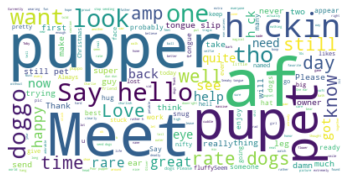

<Figure size 432x288 with 0 Axes>

In [77]:
# Use the data to form a word Cloud text
text1 = " ".join(review for review in wrangled_df.text) 

# Use all texts in the column 'text' and using df_result to create the cloud
# First form a stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["puppy", "Bruno", "dog", "good", "boy", 'cool'])

# Then as a result we have a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# They will show as a generated image:
# Use matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png', bbox_inches='tight')

Analyse to check the most common dog Breed through a chart and predictions columns

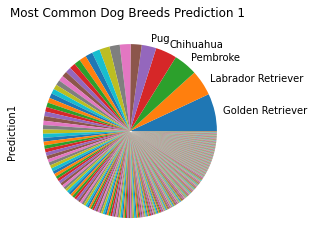

In [78]:
# create an array, the same length as the values in the prediction 1 column
labels = np.full(len(wrangled_df.Prediction1.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
labels[4] = 'Pug'
wrangled_df.Prediction1.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds Prediction 1 ')
plt.savefig('Most_Common_Dog_Breeds1.png', bbox_inches='tight')

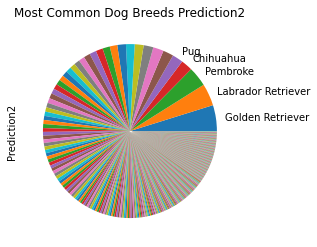

In [79]:
# create an array, the same length as the values in the prediction 2 column
labels = np.full(len(wrangled_df.Prediction2.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
labels[4] = 'Pug'
wrangled_df.Prediction2.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds Prediction2')
plt.savefig('Most_Common_Dog_Breeds2.png', bbox_inches='tight')

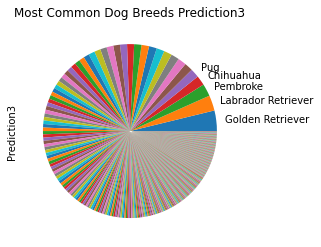

In [80]:
# create an array, the same length as the values in the prediction 3 column
labels = np.full(len(wrangled_df.Prediction3.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
labels[4] = 'Pug'
wrangled_df.Prediction3.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds Prediction3')
plt.savefig('Most_Common_Dog_Breeds3.png', bbox_inches='tight')

    Conclusion: 

    Golden Retriever is the most common breed among the 3 predictions columns

    Make analysis to show the most common dog stage

In [81]:
stage_count = list(wrangled_df[wrangled_df['Stages_of_dogs'] != 'None']['Stages_of_dogs'].value_counts())[0:4]

In [82]:
len(stage_count)

4

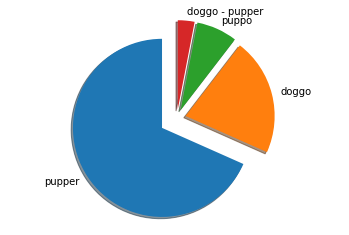

In [83]:
stage_count = list(wrangled_df[wrangled_df['Stages_of_dogs'] != 'None']['Stages_of_dogs'].value_counts())[0:4]
stages = wrangled_df[wrangled_df['Stages_of_dogs'] != 'None']['Stages_of_dogs'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(stage_count, explode = explode, labels = stages, shadow = True, startangle = 90)
axis1.axis('equal')
plt.savefig('Most_Common_Dog_Stage.png', bbox_inches='tight')

    Conclusion:

    Pupper stage dogs gets most of the posted tweets

    Display the relation between Retweets & Likes or favourites through a chart

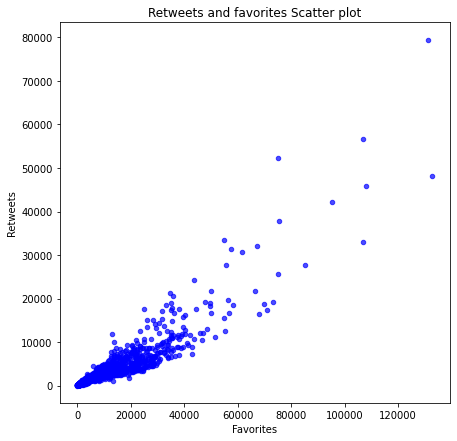

In [84]:
wrangled_df.plot(kind='scatter',x='likes',y='retweets', alpha = 0.7, figsize=(7,7), color='Blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.savefig('Retweets_and favorites_Scatter_plot.png', bbox_inches='tight')

    Conclusion:

    Retweets are showing as positive correlated with the favpurite or Likes.

    Correlation Heat Map showing big positive (+0.9; shown on map) between the Favourite and retweets.

    Make Analysis for the Top 5 dogs names

In [85]:
# use value counts to conclude the top 5 names
wrangled_df.name.value_counts()

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
           ..
Bauer       1
Aiden       1
Dug         1
Timmy       1
Willy       1
Name: name, Length: 913, dtype: int64

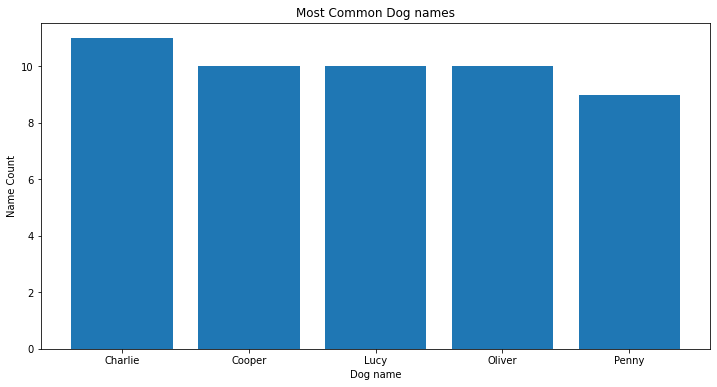

<Figure size 432x288 with 0 Axes>

In [86]:
# Display the top 5 names among dogs
name = ['Charlie', 'Cooper', 'Lucy', 'Oliver', 'Penny']
name_counts = [11, 10, 10, 10, 9]

# excute the analysis on a chart
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(name,name_counts, width = 0.8)
ax.set_ylabel('Name Count')
ax.set_xlabel('Dog name')
plt.title("Most Common Dog names")
plt.show()
plt.savefig('Most Common Dog names.png', bbox_inches='tight')

    Analysis to check the most used devices to send tweets

In [87]:
# Use the source column after it has been cleaned in the previous stage
wrangled_df.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

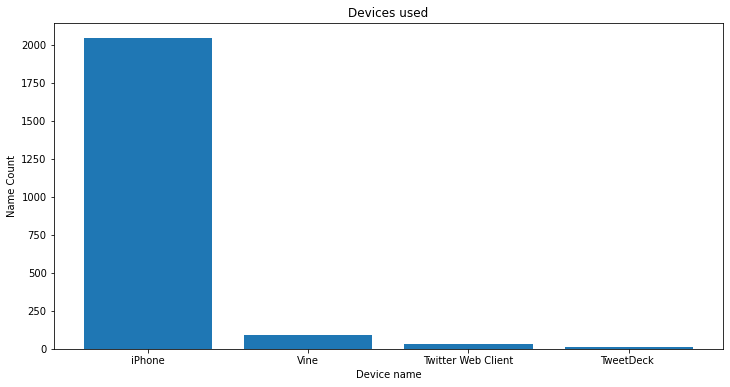

<Figure size 432x288 with 0 Axes>

In [88]:
# scanning the analysis showed the devices from highest to least used device
device_name = ['iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck ']
device_name_counts = [2042, 91, 31, 11]
 
# excute the analysis on a chart    
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(device_name,device_name_counts, width = 0.8)
ax.set_ylabel('Name Count')
ax.set_xlabel('Device name')
plt.title("Devices used")
plt.show()
plt.savefig('devices used.png', bbox_inches='tight')

In [89]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1350 non-null   object 
 10  doggo                  74 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 212 non-null    object 
 13  puppo                  23 non-null     object 
 14  Stages_of_dogs         306 non-null    object 
 15  jpg_